In [1]:
import sys
sys.path.insert(1, '../')

In [2]:
import warnings
import gym, gym_walk
from n_step_temporal_difference import n_step_temporal_difference
from utils.common_utils import (evaluate_policy, print_policy_success_stats,
                                plot_state_value_function, plot_policy, rmse)
warnings.filterwarnings('ignore')

In [3]:
env = gym.make('RandomWalk-v0')
init_state = env.reset()
goal_state = 6
gamma = 1.0  # Episodic
n_episodes = 500
P = env.env.P

LEFT, RIGHT = range(2)
pi = lambda s: {
    0: LEFT, 1: LEFT, 2: LEFT, 3: LEFT, 4: LEFT, 5: LEFT, 6: LEFT
}[s]
action_symbols = ['<', '>']
row, col = 1, 7

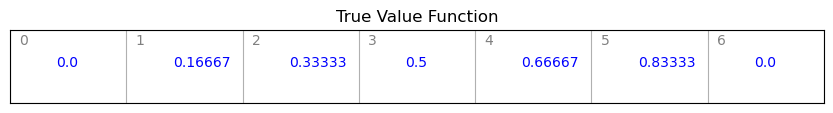

By using the Policy, success rate to reach goal is: 43.00%
By using the Policy, mean reward is: 0.4800


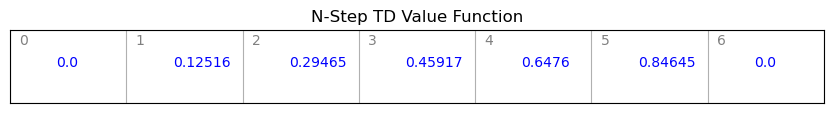

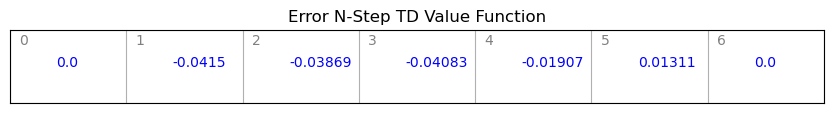

RMSE: 0.0278


In [4]:
V_true = evaluate_policy(pi, P, gamma=gamma)
plot_state_value_function(row, col, V_true, 'True Value Function')
print_policy_success_stats(env, pi, goal_state=goal_state, gamma=gamma)

V_ntd = n_step_temporal_difference(pi, env, gamma=gamma, n_episodes=n_episodes)
plot_state_value_function(row, col, V_ntd, 'N-Step TD Value Function')
plot_state_value_function(row, col, V_ntd - V_true, 'Error N-Step TD Value Function')

print('RMSE:', rmse(V_ntd, V_true))
